In [1]:
import tensorflow as tf
import os
import glob

!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2024-03-25 08:48:19.657743: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 08:48:19.750550: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-25 08:48:20.183001: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 08:48:21.564040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Defaulting to user installation because normal site-packages is not writeable


In [2]:
train_images_path_pattern = os.path.join("train", "*", "*.jpg")
train_image_file_paths = glob.glob(train_images_path_pattern)

test_images_path_pattern = os.path.join("test", "*", "*.jpg")
test_image_file_paths = glob.glob(test_images_path_pattern)

train_image_file_paths[:5], test_image_file_paths[:5]

(['train/muffin/img_4_7.jpg',
  'train/muffin/img_2_490.jpg',
  'train/muffin/img_3_100.jpg',
  'train/muffin/img_3_791.jpg',
  'train/muffin/img_3_408.jpg'],
 ['test/muffin/img_3_1240.jpg',
  'test/muffin/img_3_50.jpg',
  'test/muffin/img_0_31.jpg',
  'test/muffin/img_2_305.jpg',
  'test/muffin/img_3_1013.jpg'])

('train/chihuahua/img_0_692.jpg', 3, (957, 1300, 3))

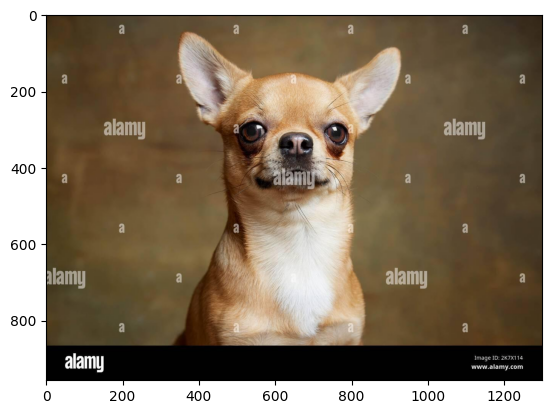

In [3]:
import random

random_image_path = random.choice(train_image_file_paths)

image = mpimg.imread(random_image_path)
plt.show()
plt.imshow(image)
random_image_path, image.ndim, image.shape

In [4]:
img_shapes = []
for i, image_file_path in enumerate(train_image_file_paths):
	image = mpimg.imread(image_file_path)
	img_shapes.append(image.shape + (i,))

img_shapes.sort()

In [5]:
len(img_shapes), img_shapes[-10:], img_shapes[:10]

(4733,
 [(3277, 2500, 3, 1541),
  (3458, 3498, 3, 2933),
  (3692, 3747, 3, 1835),
  (3888, 2592, 3, 2144),
  (4000, 3000, 3, 3864),
  (4000, 3000, 3, 4490),
  (4032, 3024, 3, 59),
  (4032, 3024, 3, 2056),
  (4032, 3024, 3, 2389),
  (4032, 3024, 3, 4091)],
 [(129, 389, 3, 2586),
  (129, 389, 3, 3693),
  (135, 372, 3, 2222),
  (138, 364, 3, 1376),
  (140, 359, 3, 4005),
  (146, 345, 3, 3697),
  (147, 343, 3, 1901),
  (150, 150, 3, 1396),
  (150, 150, 3, 3704),
  (150, 200, 3, 2592)])

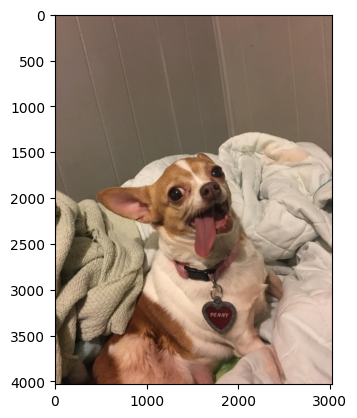

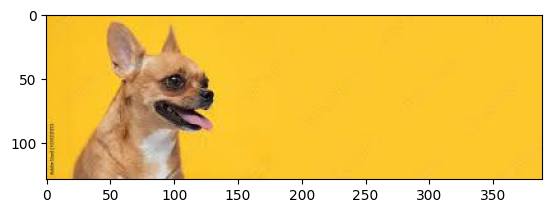

In [6]:
biggest_image = mpimg.imread(train_image_file_paths[4091])
plt.show()
plt.imshow(biggest_image)

smallest_image = mpimg.imread(train_image_file_paths[2586])
plt.show()
plt.imshow(smallest_image)

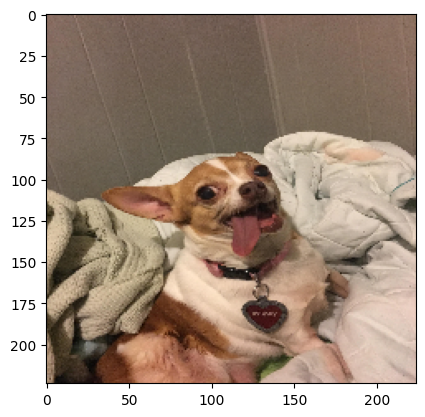

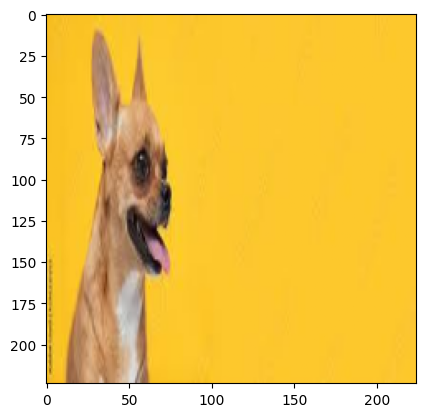

In [7]:
tensor_biggest_image_downscaled = tf.image.resize(
    images=biggest_image / 255.0,
    size=[224, 224],
    # method=tf.image.ResizeMethod.BILINEAR,
    # preserve_aspect_ratio=False,
    # antialias=False,
    # name=None
)

tensor_smallest_image_downscaled = tf.image.resize(
    images=smallest_image / 255.0,
    size=[224, 224]
)

plt.imshow(tensor_biggest_image_downscaled)
plt.show()

plt.imshow(tensor_smallest_image_downscaled)
plt.show()

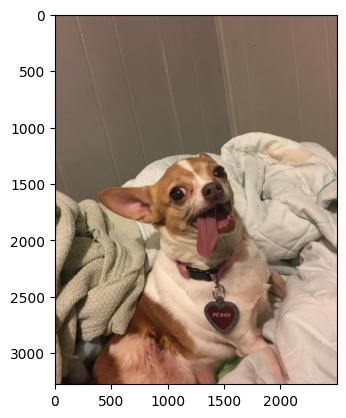

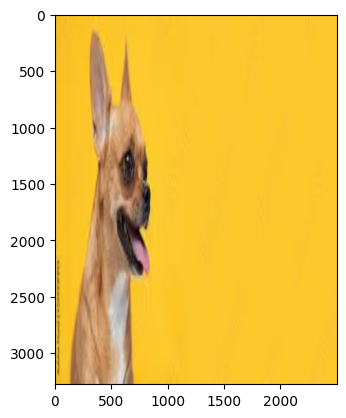

In [8]:
tensor_biggest_image_upscaled = tf.image.resize(
    images=biggest_image / 255.0,
    size=[3277, 2500]
)

tensor_smallest_image_upscaled = tf.image.resize(
    images=smallest_image / 255.0,
    size=[3277, 2500]
)

plt.imshow(tensor_biggest_image_upscaled)
plt.show()

plt.imshow(tensor_smallest_image_upscaled)
plt.show()


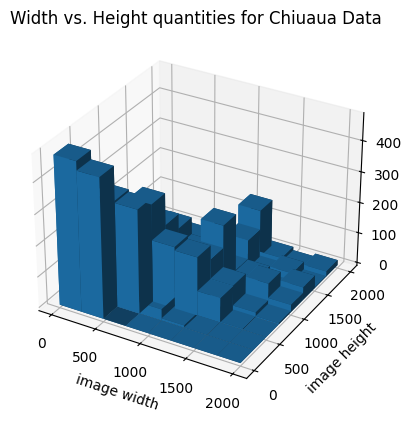

In [9]:
# https://stackoverflow.com/questions/52385299/plot-a-3d-bar-histogram

import numpy as np
import numpy.random
import matplotlib.pyplot as plt

# !pip install ipympl
# %matplotlib widget

# To generate some test data
# x = np.random.randn(500)
# y = np.random.randn(500)
x = [shape[0] for shape in img_shapes]
y = [shape[1] for shape in img_shapes]

XY = np.stack((x,y),axis=-1)

def selection(XY, limitXY=[[-2,+2],[-2,+2]]):
        XY_select = []
        for elt in XY:
            if elt[0] > limitXY[0][0] and elt[0] < limitXY[0][1] and elt[1] > limitXY[1][0] and elt[1] < limitXY[1][1]:
                XY_select.append(elt)

        return np.array(XY_select)

limitXY=[[0, 2000],[0, 2000]]
XY_select = selection(XY, limitXY=limitXY)


# xAmplitudes = np.array(XY_select)[:,0]#your data here
# yAmplitudes = np.array(XY_select)[:,1]#your other data here

# xAmplitudes = [shape[0] for shape in img_shapes]
# yAmplitudes = [shape[1] for shape in img_shapes]


fig = plt.figure() #create a canvas, tell matplotlib it's 3d
ax = fig.add_subplot(111, projection='3d')


hist, xedges, yedges = np.histogram2d(x, y, bins=(8,8), range =limitXY) # you can change your bins, and the range on which to take data
# hist is a 7X7 matrix, with the populations for each of the subspace parts.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:]) -(xedges[1]-xedges[0])


xpos = xpos.flatten()*1./2
ypos = ypos.flatten()*1./2
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

# cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
# max_height = np.max(dz)   # get range of colorbars so we can normalize
# min_height = np.min(dz)
# # scale each z to [0,1], and get their rgb values
# rgba = [cmap((k-min_height)/max_height) for k in dz] 

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.title("Width vs. Height quantities for Chiuaua Data")
plt.xlabel("image width")
plt.ylabel("image height")
# plt.savefig("Your_title_goes_here")
plt.show()


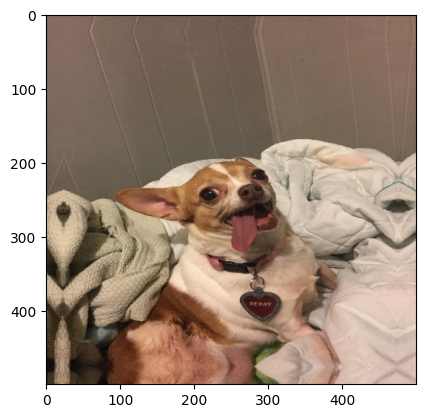

In [59]:
import tensorflow.keras.layers as layers

augmenting_layer = tf.keras.Sequential([
	layers.RandomFlip(0.5),
	layers.RandomZoom(0.5),
	layers.RandomRotation(0.5),
	layers.Rescaling(1 / 255),
	layers.Resizing(500, 500, crop_to_aspect_ratio=False)
])

# augmenting_layer.build()

augmented_image = augmenting_layer(biggest_image)

augmented_image.shape, biggest_image.shape

plt.imshow(augmented_image)
plt.show()

In [45]:
expanded_augmented_image = tf.expand_dims(augmented_image, 0)
expanded_augmented_image.shape

TensorShape([1, 500, 500, 3])

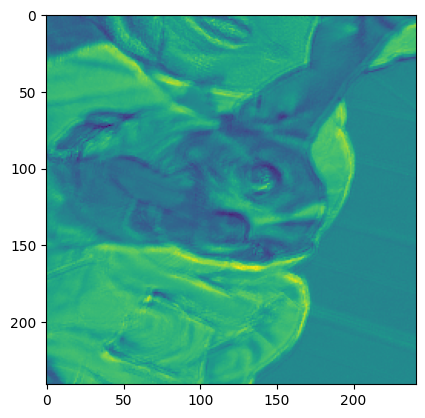

In [60]:
convolution_layer = tf.keras.Sequential([
	layers.Conv2D(filters=10, kernel_size=10),
	layers.Conv2D(filters=10, kernel_size=10),
	layers.MaxPool2D(),
])

convoluted_image = convolution_layer(expanded_augmented_image)

convoluted_image.shape, augmented_image.shape

plt.imshow(tf.squeeze(convoluted_image)[:,:,0])
plt.show()

In [68]:
# inputs = layers.Input(shape=(500, 500, 3), name="input_layer")

model = tf.keras.Sequential()

model.add(augmenting_layer)
model.add(convolution_layer)
# x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
model.add(layers.Dense(1, activation="sigmoid", name="output_layer"))

model.summary()


Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_38 (Sequential)      │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_39 (Sequential)      │ ?                      │        13,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,020 (50.86 KB)

 Trainable params: 13,020 (50.86 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
train_images = [tf.constant(mpimg.imread(file_path)) for file_path in train_image_file_paths]
train_labels = [0 if "chiuaua" in file_path else 1 for file_path in train_image_file_paths]

In [73]:
model.fit(train_images, )

<tf.Tensor: shape=(577, 450, 3), dtype=uint8, numpy=
array([[[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [230, 230, 228],
        [231, 231, 229],
        [231, 231, 229]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [230, 230, 228],
        [232, 232, 230],
        [232, 232, 230]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [230, 230, 228],
        [233, 233, 231],
        [233, 233, 231]],

       ...,

       [[210, 194, 171],
        [202, 186, 161],
        [200, 184, 158],
        ...,
        [  8,   7,   2],
        [ 19,  20,  22],
        [ 16,  20,  23]],

       [[210, 195, 172],
        [202, 188, 162],
        [200, 186, 159],
        ...,
        [ 17,  16,  12],
        [ 25,  27,  26],
        [ 27,  31,  32]],

       [[206, 196, 169],
        [205, 195, 168],
        [201, 190, 162],
        ...,
        [  7,   6,   